<a href="https://colab.research.google.com/github/JFessl/Neural-Network/blob/master/MNIST_Deep_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [6]:
np.random.seed(0)

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [9]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the numbers of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the numbers of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

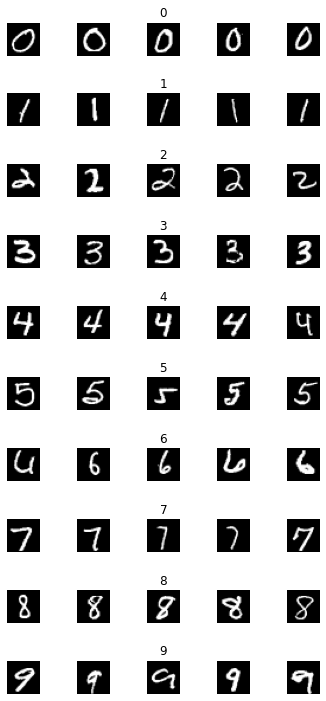

In [10]:
from matplotlib.cm import get_cmap
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

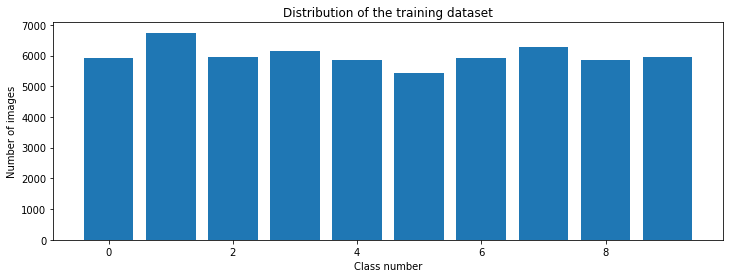

In [11]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [15]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [16]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose =1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 3s 3ms/step - loss: 0.6647 - accuracy: 0.7838 - val_loss: 0.3700 - val_accuracy: 0.8873
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4191 - accuracy: 0.8759 - val_loss: 0.3461 - val_accuracy: 0.8983
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8886 - val_loss: 0.3226 - val_accuracy: 0.9085
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.3673 - accuracy: 0.8932 - val_loss: 0.2853 - val_accuracy: 0.9162
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3489 - accuracy: 0.9001 - val_loss: 0.2933 - val_accuracy: 0.9145
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.9054 - val_loss: 0.2554 - val_accuracy: 0.9233
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.9068 - val_loss: 0.2493 - val_accuracy: 0.9277
Epoch 

Text(0.5, 0, 'epoch')

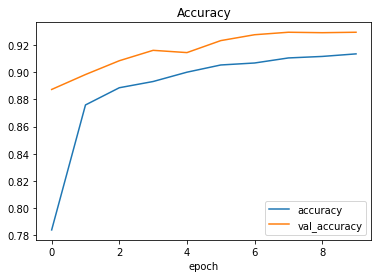

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

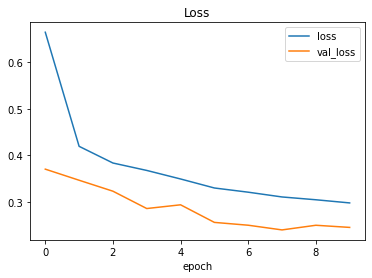

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [20]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3025844097137451
Test accuracy: 0.911899983882904


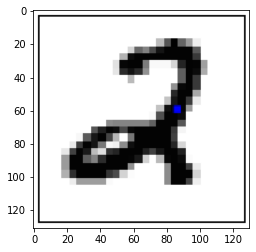

In [21]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
#print(response)
img = Image.open(response.raw)
plt.imshow(img)

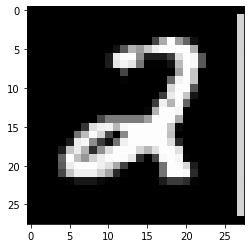

In [25]:
import cv2

img_array = np.asarray(img)
#print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
gray_scale =cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
#print(gray_scale.shape)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [26]:
image = image/255
image = image.reshape(1, 784)

In [29]:
prediction = np.argmax(model.predict(image), axis=-1)
print("Predicted digit:", prediction)

1/1 [==============================] - 0s 152ms/step
Predicted digit: [2]
